<a href="https://colab.research.google.com/github/smeshnayasova61/project/blob/main/%D0%92%D0%B5%D1%80%D1%81%D0%B8%D1%8F_%D0%B8%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81_%D1%83%D1%87%D0%B8%D1%82%D0%B5%D0%BB%D0%B5%D0%BC_%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D0%91%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA%D0%B8_python_%D0%B4%D0%BB%D1%8F_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### Data Science проект:
1) Постановка задачи
2) Получение данных
3) Анализ данных
4) Визуализация данных
5) Предобработка данных
6) Генерация новых признаков
7) Построение модели
8) Оценка качества
9) Внедрение модели
10) Мониторинг качества и улучшение модели

1) Постановка задачи

Описание задачи:
Цель - предсказать стоимость дома
Зачем?
В банках, страховых компаниях:
Узнать истинную стоимость имущества (залога)
Принять решение о выдаче ипотеки/страховки
Принять решение о % по ипотеке/страховке

На площадках объявлений (Авито, Циан, ...):
Найти недооцененные квартиры (~ выгодные предложения), показать их пользователям
Показывать рыночную стоимость квартиры пользователям
Для тех, кто продает квартиру, рекомендовать цену продажи

Для инвесторов в недвижимость:
Определять рыночную стоимость квартир
Поиск недооцененных активов
Торговля на рынке недвижимости

2) Получение данных- загрузка датасетов

Подключение библиотек и скриптов

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

'''
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
'''

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

пути к директориям и файлам

In [ ]:
DATASET_PATH = "C:/Users/Lenovo/Documents/Geekbrains/3 Библиотеки Python для DS NP, Pandas, MPL/Проект/housing.csv"
TRAIN_DATASET_PATH = "C:/Users/Lenovo/Documents/Geekbrains/3 Библиотеки Python для DS NP, Pandas, MPL/Проект/housing_train_ext (1).csv"
PREPARED_DATASET_PATH = "C:/Users/Lenovo/Documents/Geekbrains/3 Библиотеки Python для DS NP, Pandas, MPL/Проект/housing_prepared.csv"

Считываем данные. По строкам - наблюдения, по столбцам - признаки.

In [ ]:
df = pd.read_csv(DATASET_PATH, sep=',')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,20635
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,20636
20637,-121.22,39.43,17.0,2254.0,485.0,NaN,433.0,1.7000,92300.0,INLAND,20637
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,20638


3) Анализ данных.

Мы видим, что это массив из 20640 строк и 11 столбцов. Здесь каждая строка отвечает какому-то объекту (в нашем случае - объекту недвижимости), а столбцы - каким-то его характеристикам.

In [ ]:
df.shape

(20640, 11)

In [ ]:
columns = df.columns
columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'id'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=20640, step=1)

In [ ]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
id                      int64
dtype: object

In [ ]:
#Обнаружение пропущенных значений
df.isna().sum()

longitude               0
latitude                0
housing_median_age    722
total_rooms             0
total_bedrooms        207
population            599
households              0
median_income           0
median_house_value      0
ocean_proximity         0
id                      0
dtype: int64

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,id
count,20640.000000,20640.000000,19918.000000,20640.000000,20433.000000,20041.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.471242,35.036934,28.653630,2635.763081,537.870553,1425.418243,499.539680,3.870671,206855.816909,10319.500000
std,5.041408,94.903955,12.576796,2181.615252,421.385070,1135.185798,382.329753,1.899822,115395.615874,5958.399114
min,-124.350000,-13534.030000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,786.000000,280.000000,2.563400,119600.000000,5159.750000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1165.000000,409.000000,3.534800,179700.000000,10319.500000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1726.000000,605.000000,4.743250,264725.000000,15479.250000
max,122.030000,1327.130000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,20639.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  19918 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20041 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  id                  20640 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 1.7+ MB


In [ ]:
#Вывод числовых переменных
num_feat = list(df.select_dtypes(exclude='object').columns)
num_feat

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'id']

In [ ]:
#Вывод строковых переменных
obj_feat = list(df.select_dtypes(include='object').columns)
obj_feat

['ocean_proximity']

In [ ]:
#Выбор целевой переменной для предсказания стоимости дома
target = df['median_house_value']
target

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

4)Визуализация данных.

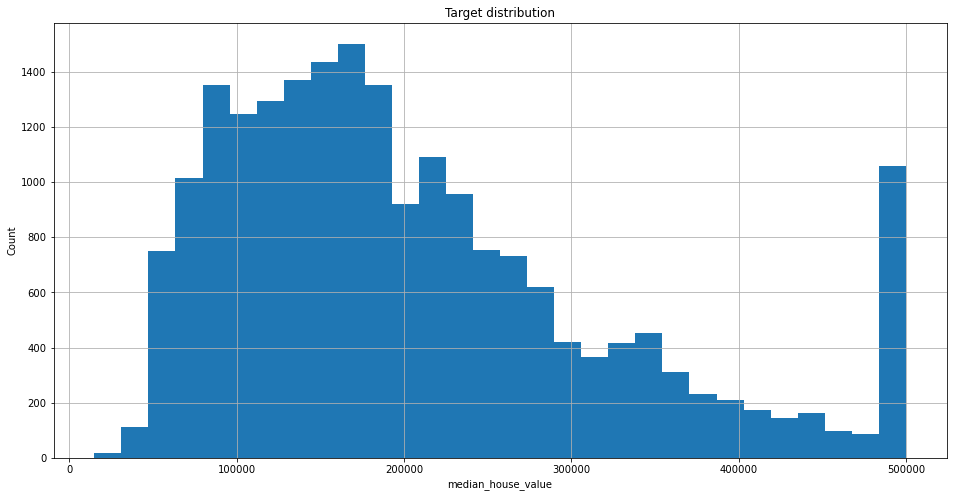

In [ ]:
plt.figure(figsize = (16,8))

df['median_house_value'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('median_house_value')

plt.title('Target distribution')
plt.show()

Статистика

Среднее арифметическое

In [ ]:
median_house_value=df['median_house_value']

In [ ]:
mean_mhv = np.mean(median_house_value)
mean_mhv

206855.81690891474

Дисперсия - это показатель вариации, который представляет собой средний квадрат отклонений от математического ожидания (среднее арифметическое). Она выражает разброс чисел относительно среднего значения.

In [ ]:
variance_mhv = np.mean((median_house_value - mean_mhv) ** 2)
variance_mhv

13315503000.817923

Стандартное отклонение (среднеквадратичное отклонение) - это величина, характеризующая разброс данных относительно среднего значения.

In [ ]:
std_mhv = np.sqrt(variance_mhv)
#std_np = np.std(median_house_value)
std_mhv

115392.82040412186

Медиана - значение, которая делит его на две равные части или же проще говоря, это середина отсортированной выборки.

In [ ]:
median_mhv=df['median_house_value'].median()
#median=np.median(median_house_value)
median_mhv

179700.0

Мода - это объект с максимальной частотой или проще говоря, самый популярный (частовстречаемый) объект в выборке.

In [ ]:
mode_mhv=df['median_house_value'].mode()
mode_mhv

0    500001.0
Name: median_house_value, dtype: float64

5) Предобработка данных: пропуски, выбросы, обработка категорий

обработка пропусков

In [ ]:
#проверка на суммарное наличие пропусков в датафрейме
df.isna().sum()

longitude               0
latitude                0
housing_median_age    722
total_rooms             0
total_bedrooms        207
population            599
households              0
median_income           0
median_house_value      0
ocean_proximity         0
id                      0
dtype: int64

housing_median_age

In [ ]:
#найдем медиану hma
median_hma = df['housing_median_age'].median()
median_hma

29.0

In [ ]:
#замена пропусков на медиану_hma
df['housing_median_age'].fillna(median_hma).isna().sum()

0

In [ ]:
#проверка на отсутствие пропусков в hma
df['housing_median_age'].isna().sum()

722

In [ ]:
#замена в датафрейме столбца hma на столбец без пропусков
df['housing_median_age'] = df['housing_median_age'].fillna(median_hma)

In [ ]:
# проверка на отсутствие пропусков в датафрейме
df['housing_median_age'].isna().sum()

0

total_bedrooms

In [ ]:
# найдем медиану tb
median_tb = df['total_bedrooms'].median()
median_tb

435.0

In [ ]:
# заполним пропуски в tb на медиану  и изменим значения во всем датафрейме
df['total_bedrooms'].fillna(median_tb, inplace=True)

In [ ]:
# проверка на отсутствие пропусков в датафрейме
df['total_bedrooms'].isna().sum()

0

population

In [ ]:
#Найдем медиану population
median_pop = df['population'].median()
median_pop

1165.0

In [ ]:
# заполним пропуски в pop на медиану  и изменим значения во всем датафрейме
df['population'].fillna(median_pop, inplace=True)

In [ ]:
df['population'].isna().sum()

0

In [ ]:
#проверим весь датафрейм на пропуски
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
id                    0
dtype: int64

In [ ]:
# нет пропусков
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  id                  20640 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 1.7+ MB


Выбросы - это объекты в данных, которые не принадлежат определенной зависимости. Это ненормальное наблюдение, которое находятся далеко от других наблюдений.

In [ ]:
#2. Выбросы(outliers)-заменим эти значения на средне арифметические
df.loc[df['median_house_value'] > 500000, 'median_house_value'] = mean_mhv

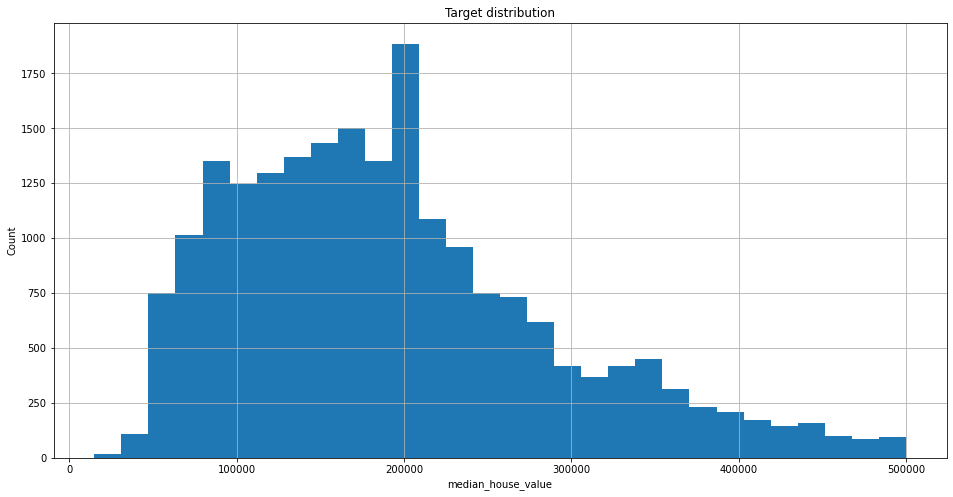

In [ ]:
plt.figure(figsize = (16,8))

df['median_house_value'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('median_house_value')

plt.title('Target distribution')
plt.show()

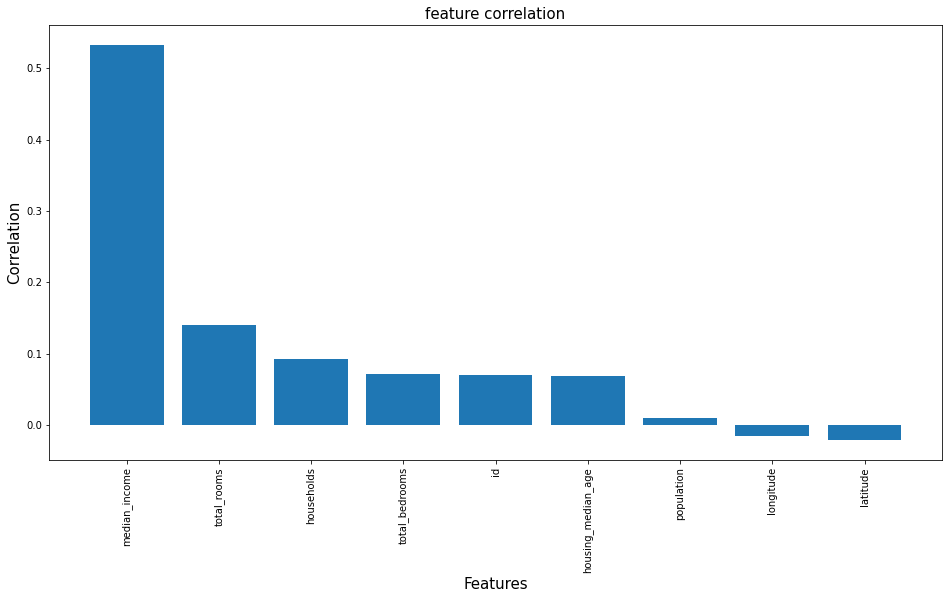

In [ ]:
#Корреляция значения средней цены от каждого признака
correlation = df.corrwith(df['median_house_value']).sort_values(ascending=False)
correlation.drop('median_house_value', inplace=True)

plt.figure(figsize = (16, 8))
plt.bar(correlation.index, correlation)
plt.xticks(rotation='90')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Correlation', fontsize=15)
plt.title('feature correlation', fontsize=15)
plt.show()


Широта принимает значения от −90° до 90°. 0° – широта экватора; −90° – широта Южного полюса; 90° – широта Северного полюса. Положительные значения соответствуют северной широте (точки севернее экватора, сокращённо с.ш. или N); отрицательные – южной широте (точки южнее экватора, сокращённо ю.ш. или S).
Долгота отсчитывается от нулевого меридиана (IERS Reference Meridian в системе WGS 84) и принимает значения от −180° до 180°. Положительные значения соответствуют восточной долготе (сокращённо в.д. или E); отрицательные – западной долготе (сокращённо з.д. или W).

Калифорнии находится в западном и северном полушарии
Координаты Калифорнии (в десятичных градусах):
Широта: 35,1258000 c.ш.
Долгота: -117,985 з.д.

In [ ]:
df['longitude'].median()


-118.49

In [ ]:
#нашли числа, где долгота >= 0
df[df['longitude'] >= 0]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
3479,118.51,34.29,29.0,1287.0,194.0,525.0,187.0,6.4171,319300.000000,<1H OCEAN,3479
5904,118.43,34.29,39.0,1769.0,410.0,1499.0,390.0,3.1212,153500.000000,<1H OCEAN,5904
8405,118.36,33.93,40.0,1625.0,500.0,2036.0,476.0,2.6298,156500.000000,<1H OCEAN,8405
8636,118.41,33.88,43.0,2492.0,449.0,1033.0,437.0,7.9614,206855.816909,<1H OCEAN,8636
13051,121.29,38.61,17.0,13553.0,2474.0,6544.0,2359.0,3.9727,132700.000000,INLAND,13051
15263,117.27,33.02,21.0,2144.0,340.0,928.0,344.0,5.7980,286100.000000,NEAR OCEAN,15263
17085,0.00,37.47,33.0,1266.0,415.0,1991.0,334.0,2.9200,202800.000000,NEAR OCEAN,17085
17359,0.00,34.88,4.0,3680.0,559.0,1678.0,569.0,5.0639,201700.000000,<1H OCEAN,17359
18551,122.03,36.96,28.0,1607.0,421.0,926.0,385.0,2.4250,216100.000000,NEAR OCEAN,18551
19423,0.00,37.69,5.0,9601.0,1639.0,4449.0,1575.0,4.5332,195500.000000,INLAND,19423


In [ ]:
#елси долгота >=0 то это выброс, запишем его как 1, нет выброса - 0
df['longitude_outlier'] = 0
df.loc[df['longitude'] >= 0, 'longitude_outlier'] = 1

In [ ]:
#соберем все выбросы долготы
df[df['longitude'] >= 0]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,longitude_outlier
3479,118.51,34.29,29.0,1287.0,194.0,525.0,187.0,6.4171,319300.000000,<1H OCEAN,3479,1
5904,118.43,34.29,39.0,1769.0,410.0,1499.0,390.0,3.1212,153500.000000,<1H OCEAN,5904,1
8405,118.36,33.93,40.0,1625.0,500.0,2036.0,476.0,2.6298,156500.000000,<1H OCEAN,8405,1
8636,118.41,33.88,43.0,2492.0,449.0,1033.0,437.0,7.9614,206855.816909,<1H OCEAN,8636,1
13051,121.29,38.61,17.0,13553.0,2474.0,6544.0,2359.0,3.9727,132700.000000,INLAND,13051,1
15263,117.27,33.02,21.0,2144.0,340.0,928.0,344.0,5.7980,286100.000000,NEAR OCEAN,15263,1
17085,0.00,37.47,33.0,1266.0,415.0,1991.0,334.0,2.9200,202800.000000,NEAR OCEAN,17085,1
17359,0.00,34.88,4.0,3680.0,559.0,1678.0,569.0,5.0639,201700.000000,<1H OCEAN,17359,1
18551,122.03,36.96,28.0,1607.0,421.0,926.0,385.0,2.4250,216100.000000,NEAR OCEAN,18551,1
19423,0.00,37.69,5.0,9601.0,1639.0,4449.0,1575.0,4.5332,195500.000000,INLAND,19423,1


In [ ]:
#присвоим выбросам отрицательные значения
df.loc[df['longitude'] > 0, 'longitude'] * -1

3479    -118.51
5904    -118.43
8405    -118.36
8636    -118.41
13051   -121.29
15263   -117.27
18551   -122.03
Name: longitude, dtype: float64

In [ ]:
#зафиксируем это в датафрейме
df.loc[df['longitude'] > 0, 'longitude'] = df.loc[df['longitude'] > 0, 'longitude'] * -1

In [ ]:
#данные =0 заменим на медиану
df.loc[df['longitude'] == 0, 'longitude'] = df['longitude'].median()

In [ ]:
#записали исправленные выбросы в датефрейм
df[df['longitude'] >= 0]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,longitude_outlier


In [ ]:
#Проверка - сравним значения под индексом 17459 (0заменился на медиану)
df['longitude'].head(17360)

0       -122.23
1       -122.22
2       -122.24
3       -122.25
4       -122.25
          ...  
17355   -120.43
17356   -120.42
17357   -120.43
17358   -120.43
17359   -118.49
Name: longitude, Length: 17360, dtype: float64

latitude-широта

In [ ]:
df['latitude'].median()

34.26

In [ ]:
#выбираем выбросы из датафрейма
df[(df['latitude'] <= 0) | (df['latitude'] > 50)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,longitude_outlier
8283,-118.13,-13534.03,45.0,1016.0,172.0,361.0,163.0,7.5000,434500.0,NEAR OCEAN,8283,0
12772,-121.42,1327.13,29.0,2217.0,536.0,1203.0,507.0,1.9412,73100.0,INLAND,12772,0


In [ ]:
#введем новый признак latitude_outlier: есть выбросы=1, нет=0
df['latitude_outlier'] = 0
df.loc[(df['latitude'] <= 0) | (df['latitude'] > 50), 'latitude_outlier'] = 1

In [ ]:
#быберем выбросы из датафрейма
df[(df['latitude'] <= 0) | (df['latitude'] > 50)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,longitude_outlier,latitude_outlier
8283,-118.13,-13534.03,45.0,1016.0,172.0,361.0,163.0,7.5000,434500.0,NEAR OCEAN,8283,0,1
12772,-121.42,1327.13,29.0,2217.0,536.0,1203.0,507.0,1.9412,73100.0,INLAND,12772,0,1


In [ ]:
#выбросы заменим на медиану
df.loc[(df['latitude'] <= 0) | (df['latitude'] > 50), 'latitude'] = df['latitude'].median()

In [ ]:
#запишем это в датафрейм
df[(df['latitude'] <= 0) | (df['latitude'] > 50)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,longitude_outlier,latitude_outlier


In [ ]:
#проверка: выбросы под индексами 12772 (был 1327,12 стал 34,26)
df.head(12773)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,longitude_outlier,latitude_outlier
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1,0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2,0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3,0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12768,-121.43,38.61,40.0,1134.0,252.0,675.0,249.0,1.3696,65200.0,INLAND,12768,0,0
12769,-121.42,38.62,41.0,1087.0,272.0,462.0,219.0,2.0224,64900.0,INLAND,12769,0,0
12770,-121.42,38.63,42.0,1385.0,273.0,740.0,274.0,2.6055,78000.0,INLAND,12770,0,0
12771,-121.43,38.63,43.0,1009.0,225.0,604.0,218.0,1.6641,67000.0,INLAND,12771,0,0


In [ ]:
# исключаем колонку с признаком longitude_outlier,inplace=True-подтверждает запись данного действия в датефрейме
df.drop(columns='longitude_outlier', inplace=True)
df.head(12773)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,latitude_outlier
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12768,-121.43,38.61,40.0,1134.0,252.0,675.0,249.0,1.3696,65200.0,INLAND,12768,0
12769,-121.42,38.62,41.0,1087.0,272.0,462.0,219.0,2.0224,64900.0,INLAND,12769,0
12770,-121.42,38.63,42.0,1385.0,273.0,740.0,274.0,2.6055,78000.0,INLAND,12770,0
12771,-121.43,38.63,43.0,1009.0,225.0,604.0,218.0,1.6641,67000.0,INLAND,12771,0


In [ ]:
# исключаем колонку с признаком latitude_outlier,inplace=True-подтверждает запись данного действия в датефрейме
df.drop(columns='latitude_outlier', inplace=True)
df.head(12773)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4
...,...,...,...,...,...,...,...,...,...,...,...
12768,-121.43,38.61,40.0,1134.0,252.0,675.0,249.0,1.3696,65200.0,INLAND,12768
12769,-121.42,38.62,41.0,1087.0,272.0,462.0,219.0,2.0224,64900.0,INLAND,12769
12770,-121.42,38.63,42.0,1385.0,273.0,740.0,274.0,2.6055,78000.0,INLAND,12770
12771,-121.43,38.63,43.0,1009.0,225.0,604.0,218.0,1.6641,67000.0,INLAND,12771


total_bedrooms
Найдем выбросы с помощью квантилей. Наблюдения, значения которых больше 97,5% квантиля и которые меньше 2,5% квантиля будем считать выбросами и заменять на медиану.

In [ ]:
df['total_bedrooms'].describe()

count    20640.000000
mean       536.838857
std        419.391878
min          1.000000
25%        297.000000
50%        435.000000
75%        643.250000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [ ]:
#Найдем максимальное значение соответствующее 97,5% квантилю
total_bedrooms_max_value = np.quantile(df['total_bedrooms'], q=0.975)
total_bedrooms_max_value

1612.0499999999956

In [ ]:
# Найдем минимальное значение соответствующее 2,5% квантилю
total_bedrooms_min_value = np.quantile(df['total_bedrooms'], q=0.025)
total_bedrooms_min_value

84.0

In [ ]:
#введем переменную condition, которая > мах значений и меньше min значений и запишем их как признак в датафрейме
condition = (df['total_bedrooms'] > total_bedrooms_max_value) | (df['total_bedrooms'] < total_bedrooms_min_value)
df[condition]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,59
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,61
73,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0,NEAR BAY,73
81,-122.27,37.81,52.0,210.0,56.0,183.0,56.0,1.1667,112500.0,NEAR BAY,81
88,-122.27,37.80,10.0,105.0,42.0,125.0,39.0,0.9722,137500.0,NEAR BAY,88
...,...,...,...,...,...,...,...,...,...,...,...
20583,-122.00,38.73,31.0,371.0,74.0,208.0,84.0,3.8750,137500.0,INLAND,20583
20620,-121.48,39.05,40.0,198.0,41.0,151.0,48.0,4.5625,100000.0,INLAND,20620
20625,-121.52,39.12,37.0,102.0,17.0,29.0,14.0,4.1250,72000.0,INLAND,20625
20627,-121.32,39.13,5.0,358.0,65.0,169.0,59.0,3.0000,162500.0,INLAND,20627


In [ ]:
#значения > мах и < min заменили на медиану total_bedrooms
df.loc[condition, 'total_bedrooms'] = df['total_bedrooms'].median()
df['total_bedrooms'].describe()

count    20640.000000
mean       499.813808
std        275.894753
min         84.000000
25%        311.000000
50%        435.000000
75%        615.000000
max       1612.000000
Name: total_bedrooms, dtype: float64

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,20635
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,20636
20637,-121.22,39.43,17.0,2254.0,485.0,1165.0,433.0,1.7000,92300.0,INLAND,20637
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,20638


households
Найдем выбросы с помощью квантилей. Наблюдения, значения которых больше 97,5% квантиля и которые меньше 2,5% квантиля будем считать выбросами и заменять на медиану.

In [ ]:
df['households'].describe()

count    20640.000000
mean       499.539680
std        382.329753
min          1.000000
25%        280.000000
50%        409.000000
75%        605.000000
max       6082.000000
Name: households, dtype: float64

In [ ]:
households_max_value = np.quantile(df['households'], q=0.975)
households_max_value

1483.0

In [ ]:
households_min_value = np.quantile(df['households'], q=0.025)
households_min_value

72.0

In [ ]:
conditions = (df['households'] > households_max_value) | (df['households'] < households_min_value)
df[conditions]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,-122.29,37.82,2.0,158.0,435.0,94.0,57.0,2.5625,60000.0,NEAR BAY,59
61,-122.29,37.82,49.0,135.0,435.0,86.0,23.0,6.1183,75000.0,NEAR BAY,61
73,-122.29,37.81,46.0,12.0,435.0,18.0,7.0,0.4999,67500.0,NEAR BAY,73
81,-122.27,37.81,52.0,210.0,435.0,183.0,56.0,1.1667,112500.0,NEAR BAY,81
88,-122.27,37.80,10.0,105.0,435.0,125.0,39.0,0.9722,137500.0,NEAR BAY,88
...,...,...,...,...,...,...,...,...,...,...,...
20578,-121.81,38.84,37.0,352.0,435.0,238.0,67.0,2.8542,275000.0,INLAND,20578
20620,-121.48,39.05,40.0,198.0,435.0,151.0,48.0,4.5625,100000.0,INLAND,20620
20625,-121.52,39.12,37.0,102.0,435.0,29.0,14.0,4.1250,72000.0,INLAND,20625
20627,-121.32,39.13,5.0,358.0,435.0,169.0,59.0,3.0000,162500.0,INLAND,20627


In [ ]:
df.loc[conditions, 'households'] = df['households'].median()
df['households'].describe()

count    20640.000000
mean       466.698304
std        254.180080
min         72.000000
25%        292.000000
50%        409.000000
75%        577.000000
max       1483.000000
Name: households, dtype: float64

ocean_proximity-категориальные переменные

In [ ]:
#3. Обработка категорий
#ocean_proximity = pd.concat([df, pd.get_dummies(df['ocean_proximity'])], axis=1)
#ocean_proximity

In [ ]:
#выявление в датафрейме данных относящихся к типу объект
df_obj_features = df.select_dtypes(include='object')
df_obj_features.head()

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY


In [ ]:
#обзор количества таких данных
df['ocean_proximity'].value_counts()

<1H OCEAN     9127
INLAND        6542
NEAR OCEAN    2655
NEAR BAY      2288
-               23
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', '-', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
df['ocean_proximity'].nunique()

6

In [ ]:
#Обработка пропусков, создадим новую переменную ocean_proximity_nan: нет пропусков=0, есть=1
df['ocean_proximity_nan'] = 0
df.loc[df['ocean_proximity'] == '-', 'ocean_proximity_nan'] = 1

In [ ]:
#запишем переменную с пропусками в датафрейм
df[df['ocean_proximity_nan'] == 1].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,ocean_proximity_nan
1153,-121.46,39.54,14.0,5549.0,1000.0,1822.0,919.0,2.9562,142300.0,-,1153,1
2435,-119.59,36.57,19.0,1733.0,303.0,911.0,281.0,3.5987,131700.0,-,2435,1
2636,-124.15,40.59,39.0,1186.0,238.0,539.0,212.0,2.0938,79600.0,-,2636,1
5980,-117.74,34.10,26.0,2723.0,604.0,1847.0,498.0,2.6779,136000.0,-,5980,1
6373,-118.02,34.15,44.0,2419.0,437.0,1045.0,432.0,3.8750,280800.0,-,6373,1


In [ ]:
#посчитаем моду
df['ocean_proximity'].mode()

0    <1H OCEAN
Name: ocean_proximity, dtype: object

Заменим значение "-" в признаке ocean_proximity на самое популярное значение в признаке, то есть на моду.

In [ ]:
df.replace(
    {'ocean_proximity':
     {'-': df['ocean_proximity'].mode()[0]}
    },
    inplace=True)

In [ ]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9150
INLAND        6542
NEAR OCEAN    2655
NEAR BAY      2288
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
#удалим из датафрейма признак ocean_proximity_nan
df.drop(columns='ocean_proximity_nan', inplace=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,20635
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,20636
20637,-121.22,39.43,17.0,2254.0,485.0,1165.0,433.0,1.7000,92300.0,INLAND,20637
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,20638


Заменять строковые значения порядковыми числами не всегда хорошая идея, поэтому заменим на:
A) Бинарные (дамми) переменные

In [ ]:
df = pd.get_dummies(df, columns = ['ocean_proximity'])
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,id,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,20635,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,20636,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1165.0,433.0,1.7000,92300.0,20637,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,20638,0,1,0,0,0


Вещественные переменные
A) Feature discretization -мы использовали
возраст дома (0-100)
1 категория - новые дома (до 5 лет),
2 категория - дома от 5 до 10
Б) Feature binarization
только 1 признак
1 - новый дом,
0 - старый

In [ ]:
df['housing_median_age'].describe()

count    20640.000000
mean        28.665746
std         12.355019
min          1.000000
25%         19.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

In [ ]:
def age_to_cat(X):

    X['age_cat'] = 0

    X.loc[X['housing_median_age'] <= 5, 'age_cat'] = 1
    X.loc[(X['housing_median_age'] > 5) & (X['housing_median_age'] <= 10), 'age_cat'] = 2
    X.loc[(X['housing_median_age'] > 10) & (X['housing_median_age'] <= 25), 'age_cat'] = 3
    X.loc[X['housing_median_age'] > 25, 'age_cat'] = 4

    return X

In [ ]:
df = age_to_cat(df)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,id,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,age_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,0,1,0,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1,0,0,0,1,0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2,0,0,0,1,0,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3,0,0,0,1,0,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4,0,0,0,1,0,4


6) Генерация новых признаков - Новые фичи (Features)-необходимо знание статистки и индексов

In [ ]:
#Доля спален в общем количестве комнат
df['bedroom_share'] = df['total_bedrooms']/df['total_rooms'] * 100
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,id,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,age_cat,bedroom_share
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,0,1,0,4,14.659091
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1,0,0,0,1,0,3,15.579659
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2,0,0,0,1,0,4,12.951602
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3,0,0,0,1,0,4,18.445840
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4,0,0,0,1,0,4,17.209588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,20635,0,1,0,0,0,3,22.462462
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,20636,0,1,0,0,0,3,21.520803
20637,-121.22,39.43,17.0,2254.0,485.0,1165.0,433.0,1.7000,92300.0,20637,0,1,0,0,0,3,21.517303
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,20638,0,1,0,0,0,3,21.989247


In [ ]:
bedroom_share = df['bedroom_share']
bedroom_share

0        14.659091
1        15.579659
2        12.951602
3        18.445840
4        17.209588
           ...    
20635    22.462462
20636    21.520803
20637    21.517303
20638    21.989247
20639    22.118492
Name: bedroom_share, Length: 20640, dtype: float64

In [ ]:
#Сколько человек в среднем живут в одной комнате
df['population_per_room'] = df['population']/df['total_rooms']
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,id,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,age_cat,bedroom_share,population_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,0,1,0,4,14.659091,0.365909
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1,0,0,0,1,0,3,15.579659,0.338217
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2,0,0,0,1,0,4,12.951602,0.338105
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3,0,0,0,1,0,4,18.445840,0.437991
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4,0,0,0,1,0,4,17.209588,0.347265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,20635,0,1,0,0,0,3,22.462462,0.507508
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,20636,0,1,0,0,0,3,21.520803,0.510760
20637,-121.22,39.43,17.0,2254.0,485.0,1165.0,433.0,1.7000,92300.0,20637,0,1,0,0,0,3,21.517303,0.516859
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,20638,0,1,0,0,0,3,21.989247,0.398387


In [ ]:
population_per_room = df['population_per_room']
population_per_room

0        0.365909
1        0.338217
2        0.338105
3        0.437991
4        0.347265
           ...   
20635    0.507508
20636    0.510760
20637    0.516859
20638    0.398387
20639    0.498025
Name: population_per_room, Length: 20640, dtype: float64

Сохранение результатов

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,id,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,age_cat,bedroom_share,population_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,0,1,0,4,14.659091,0.365909
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1,0,0,0,1,0,3,15.579659,0.338217
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2,0,0,0,1,0,4,12.951602,0.338105
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3,0,0,0,1,0,4,18.445840,0.437991
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4,0,0,0,1,0,4,17.209588,0.347265


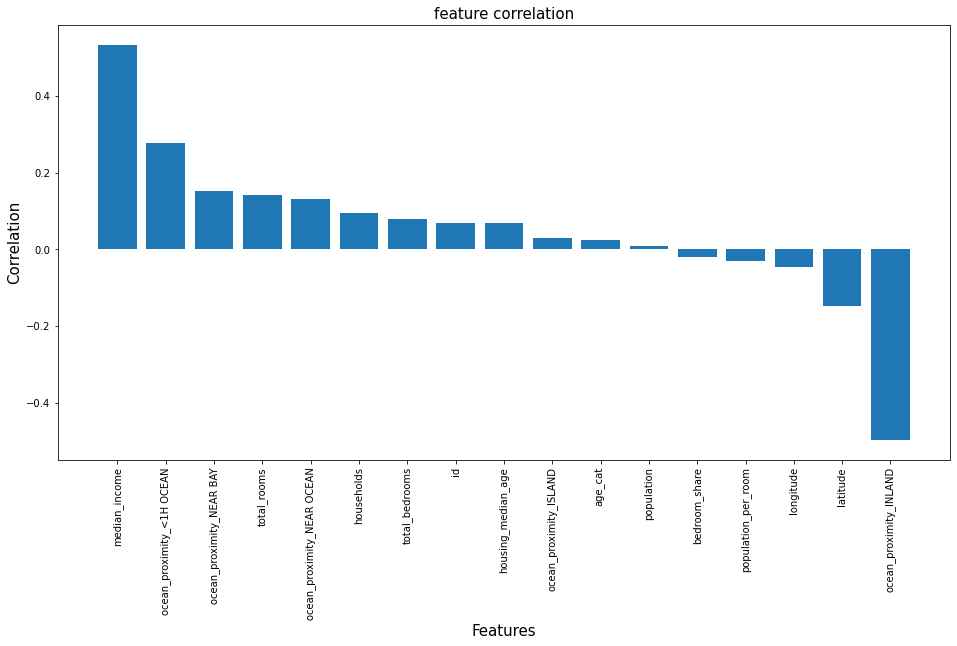

In [ ]:
#Корреляция значения средней цены от каждого признака
correlation = df.corrwith(df['median_house_value']).sort_values(ascending=False)
correlation.drop('median_house_value', inplace=True)

plt.figure(figsize = (16, 8))
plt.bar(correlation.index, correlation)
plt.xticks(rotation='90')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Correlation', fontsize=15)
plt.title('feature correlation', fontsize=15)
plt.show()


7) Построение модели

In [ ]:
#Исключаем признак 'id'
df.drop(columns='id', inplace=True)
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN', 'age_cat',
       'bedroom_share', 'population_per_room'],
      dtype='object')

Неколичественные строковые признаки всегда нужно переводить в числовое представление, так как многие модели машинного обучения не способны работать со строками.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_<1H OCEAN   20640 non-null  uint8  
 10  ocean_proximity_INLAND      20640 non-null  uint8  
 11  ocean_proximity_ISLAND      20640 non-null  uint8  
 12  ocean_proximity_NEAR BAY    20640 non-null  uint8  
 13  ocean_proximity_NEAR OCEAN  206

In [ ]:
feature_names = df.columns
feature_names

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN', 'age_cat',
       'bedroom_share', 'population_per_room'],
      dtype='object')

Создадим несколько таблиц DataFrame для более удобного хранения данных. В таблице X будут храниться признаки. В качестве названий для столбцов возьмём массив columns:

In [ ]:
X = pd.DataFrame(df, columns=feature_names)

X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,age_cat,bedroom_share,population_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,4,14.659091,0.365909
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,3,15.579659,0.338217
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,4,12.951602,0.338105
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,4,18.445840,0.437991
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,4,17.209588,0.347265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0,3,22.462462,0.507508
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0,3,21.520803,0.510760
20637,-121.22,39.43,17.0,2254.0,485.0,1165.0,433.0,1.7000,92300.0,0,1,0,0,0,3,21.517303,0.516859
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0,3,21.989247,0.398387


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_<1H OCEAN   20640 non-null  uint8  
 10  ocean_proximity_INLAND      20640 non-null  uint8  
 11  ocean_proximity_ISLAND      20640 non-null  uint8  
 12  ocean_proximity_NEAR BAY    20640 non-null  uint8  
 13  ocean_proximity_NEAR OCEAN  206

In [ ]:
#Выбор целевой переменной для предсказания стоимости дома
target = df['median_house_value']
target

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [ ]:
#index = df.index
#index

In [ ]:
y = pd.DataFrame(target, columns=['median_house_value'])
y

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_house_value  20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


Когда необходимо применять масштабирование/нормализацию:

Во всех методах понижения размерности
В линейной регрессии
В KNN
Когда не обязательно использовать масштабирование/нормализацию:

Дерево решений
Случайный лес
Градентный бустинг

Разбиение выборки на тренировочную и тестовую.
Первая нужна для того, чтобы обучить модель. Вторая - для проверки качества обученной модели: мы можем сравнить предсказанную на этих данных цену с реальной, поскольку она у нас тоже имеется.
Разбиение данных на тренировочную и тестовую выборку можно выполнить с помощью функции train_test_split из модуля sklearn.model_selection.
С помощью параметра test_size можно указать, какую часть данных мы хотим выделить под тест. размер тестовой выборки составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Попробуем  модель, созданную  с помощью RandomForestRegressor:

Рассмотрим несколько параметров данной модели:
n_estimators - число деревьев в ансамбле
max_depth - максимальная глубина дерева.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression, но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0], чтобы получить из датафрейма одномерный массив Numpy, так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.

In [ ]:
model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [ ]:
df.to_csv(TRAIN_DATASET_PATH, index=False, encoding='utf-8', sep=';')

Надо предсказать и на обучающей модели.
Создадим таблицу DataFrame чтобы сопоставить реальные значения с предсказанными.
Поскольку массив y_pred является двумерным, переведём его в одномерный, используя метод .flatten.

In [ ]:
y_pred_model = model.predict(X_test)
check_test_model = pd.DataFrame({
    "y_test": y_test["median_house_value"],
    "y_pred_model": y_pred_model.flatten()})

check_test_model.head()

,y_test,y_pred_model
20046,47700.000000,47712.701886
3024,45800.000000,45466.011411
15663,206855.816909,206855.827259
20484,218600.000000,218582.829253
9814,278000.000000,277989.659167


In [ ]:
#9) Внедрение модели
df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8', sep=';')

вызвала атрибут feature_importances_. С помощью этого атрибута найдите сумму всех показателей важности, установила, какие два признака показывают наибольшую важность.


In [ ]:
print(model.feature_importances_)

[2.65054069e-07 4.59817056e-07 1.17092085e-07 9.51283415e-08
 8.74142365e-08 9.75276191e-08 9.47942303e-08 1.07946490e-07
 9.99998290e-01 1.56847301e-08 7.54039067e-09 5.15241402e-14
 8.62552241e-09 1.77162509e-08 3.12080182e-08 1.48489469e-07
 1.55940872e-07]


In [ ]:
model.feature_importances_.sum()

1.0

In [ ]:
#установила, какие признаки показывают наибольшую важность.
feature_importance = pd.DataFrame({'name':X.columns,
                                   'feature_importance':model.feature_importances_},
                                  columns=['feature_importance', 'name'])
feature_importance

,feature_importance,name
0,2.650541e-07,longitude
1,4.598171e-07,latitude
2,1.170921e-07,housing_median_age
3,9.512834e-08,total_rooms
4,8.741424e-08,total_bedrooms
5,9.752762e-08,population
6,9.479423e-08,households
7,1.079465e-07,median_income
8,9.999983e-01,median_house_value
9,1.568473e-08,ocean_proximity_<1H OCEAN


Наиболее важными признаками оказались total_rooms, population, households, median_house_value.

8) Оценка качества.
R2 (коэффициент детерминации) функция оценки регрессии. Наилучшая возможная оценка — 1,0.

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_model)

0.9999990313513932

Для итогового проекта использую модель - RandomForestRegressor.

Построение модели с помощью LinearRegression.

Линейная регрессия - предназначен для предсказания непрерывной величины.

Стандартизация признаков xscaled=x−xmean/σx
Важно отметить, что стандартизация важна не только для отбора признаков. Стандартизация является важным этапом предобработки данных, без которого многие алгоритмы будут работать некорректно.

In [ ]:
'''
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)
'''

'\nfrom sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\nX_train_scaled = scaler.fit_transform(X_train)\nX_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)\n\nX_test_scaled = scaler.fit_transform(X_test)\nX_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)\n'

Построение модели
Линейная регрессия

Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model. Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.

In [ ]:
'''
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
'''

'\nfrom sklearn.linear_model import LinearRegression\n\nlr = LinearRegression()\n'

Обучение модели на тренировочных стандартизированных данных:

In [ ]:
'''
lr.fit(X_train_scaled, y_train)

plt.barh(feature_names, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()
'''

'\nlr.fit(X_train_scaled, y_train)\n\nplt.barh(feature_names, lr.coef_.flatten())\n\nplt.xlabel("Вес признака")\nplt.ylabel("Признак")\n\nplt.show()\n'

In [ ]:
'''
#Посмотрим, какие коэффициенты подобрала наша модель на этапе обучения. Свободный коэффициент w0 хранится в атрибуте .intercept_:
lr.intercept_
'''

'\n#Посмотрим, какие коэффициенты подобрала наша модель на этапе обучения. Свободный коэффициент w0 хранится в атрибуте .intercept_:\nlr.intercept_\n'

In [ ]:
'''
#Остальные коэффициенты w1 , … , wn хранятся в атрибуте .coef_:
lr.coef_
'''

'\n#Остальные коэффициенты w1 , … , wn хранятся в атрибуте .coef_:\nlr.coef_\n'

In [ ]:
'''
#Давайте визуализируем то, какой вклад вносит каждый из этих коэффициентов:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = 6, 4

%matplotlib inline

plt.barh(feature_names, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()
'''

'\n#Давайте визуализируем то, какой вклад вносит каждый из этих коэффициентов:\nfrom matplotlib import pyplot as plt\n\nplt.rcParams[\'figure.figsize\'] = 6, 4\n\n%matplotlib inline\n\nplt.barh(feature_names, lr.coef_.flatten())\n\nplt.xlabel("Вес признака")\nplt.ylabel("Признак")\n\nplt.show()\n'

In [ ]:
'''
X_train_scaled.describe()
'''

'\nX_train_scaled.describe()\n'

стоит обратить внимание, что наиболее важный признак - это таргет переменная, не показатель

In [ ]:
'''
#Попробуем обучить модель, используя лишь признаки, вес которых достаточно отличается от 0,
#и посмотрим, как это отразится на качестве модели:
important_features = [
    feature
    for feature, weight in zip(feature_names, lr.coef_.flatten())
    if np.abs(weight) > 0.5
]

print(important_features)
'''

'\n#Попробуем обучить модель, используя лишь признаки, вес которых достаточно отличается от 0, \n#и посмотрим, как это отразится на качестве модели:\nimportant_features = [\n    feature\n    for feature, weight in zip(feature_names, lr.coef_.flatten())\n    if np.abs(weight) > 0.5\n]\n\nprint(important_features)\n'

Теперь, когда модель обучена, мы можем получить предсказанные значения на объектах X_test с помощью метода .predict:

**Надо предсказать и на обучающей модели**

In [ ]:
'''
#обученная модель
lr.fit(
    X_train_scaled.loc[:, important_features],
    y_train
)
#обучающая модель
y_pred_lr = lr.predict(X_test_scaled.loc[:, important_features])
y_pred_lr.shape
'''

'\n#обученная модель\nlr.fit(\n    X_train_scaled.loc[:, important_features],\n    y_train\n)\n#обучающая модель\ny_pred_lr = lr.predict(X_test_scaled.loc[:, important_features])\ny_pred_lr.shape\n'

In [ ]:
'''
#9) Внедрение модели
df.to_csv(TRAIN_DATASET_PATH, index=False, encoding='utf-8', sep=';')
'''

"\n#9) Внедрение модели \ndf.to_csv(TEST_DATASET_PATH, index=False, encoding='utf-8', sep=';')\n"

Создадим таблицу DataFrame чтобы сопоставить реальные значения с предсказанными. Поскольку массив y_pred является двумерным, переведём его в одномерный, используя метод .flatten.

In [ ]:
'''
check_test_lr = pd.DataFrame({
    'y_test': y_test['median_house_value'],
    'y_pred_lr': y_pred_lr.flatten()})

check_test_lr
'''

"\ncheck_test_lr = pd.DataFrame({\n    'y_test': y_test['median_house_value'],\n    'y_pred_lr': y_pred_lr.flatten()})\n\ncheck_test_lr\n"

8) Оценка качества.

Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

In [ ]:
'''
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_lr)
'''

'\nfrom sklearn.metrics import r2_score\nr2_score(y_test, y_pred_lr)\n'

10) Мониторинг качества и улучшение модели

Одним из симптомов переобучения линейных моделей являются очень большие по модулю веса. Бороться с этим можно с помощью регуляризации. В библиотеке sklearn доступны уже готовые реализации моделей линейной регрессии с L1- и L2-регуляризацией. Это, соответственно, модели Lasso и Ridge из модуля sklearn.linear_model.
При этом, коэффициент регуляризации можно задавать с помощью параметра alpha при инициализации этих моделей.

In [ ]:
'''
from sklearn.linear_model import Lasso, Ridge
model = Lasso(alpha=0.03)
'''

'\nfrom sklearn.linear_model import Lasso, Ridge\nmodel = Lasso(alpha=0.03)\n'

In [ ]:
'''
model.fit(X_train_scaled.loc[:, important_features], y_train)
#обучающая модель
y_pred_lr = model.predict(X_test_scaled.loc[:, important_features])
'''

'\nmodel.fit(X_train_scaled.loc[:, important_features], y_train)\n#обучающая модель\ny_pred_lr = model.predict(X_test_scaled.loc[:, important_features])\n'

In [ ]:
'''
#9) Внедрение модели
df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8', sep=';')
'''

In [ ]:
'''
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_lr)
'''

'\nfrom sklearn.metrics import r2_score\nr2_score(y_test, y_pred_lr)\n'

Так как показатель R2 (коэффициент детерминации - наилучшая возможная оценка — 1,0) оказался у модели, созданной с  помощью RandomForestRegressor, то для итогового проекта берем данную модель.